In [2]:
import os
import pickle
from datetime import datetime, timezone
from scipy import stats
import pandas as pd
import matplotlib.colors
import matplotlib.cm as cm
import numpy as np

import xarray as xr
import matplotlib.pyplot as plt


In [70]:
DATA_DIRECTORY = '/vortexfs1/home/csherwood/proj/NOPP_Lee'
DATA_FILENAME = 'hurricane_lee_drifter_data_v0.pickle'
with open(os.path.join(DATA_DIRECTORY, DATA_FILENAME), 'rb') as handle:
    drifters = pickle.load(handle)
    
dirs1 = np.arange(0,365,10)
df2 = drifters['spotter']['SPOT-31232C']
df2 = df2.loc[df2.a1.dropna().index]
df2a = df2[df2.index == '2023-09-16 11:45']
f = df2a.frequency[0]
S = df2a.energy_density[0]
a1 = df2a.a1[0]
b1 = df2a.b1[0]
a2 = df2a.a2[0]
b2 = df2a.b2[0]

In [71]:
def spread1( a1, b1 ):
    # Directional spreading for each frequency (degrees)
    # Eqn. 5 in Merle et al., 2021
    return (180./np.pi)* np.sqrt( 2. * (1. - np.sqrt( a1**2 + b1**2 ) ) )

def spread2( a2, b2 ):
    return (180./np.pi)* np.sqrt( 2. * (0.5 - np.sqrt( a2**2 + b2**2 ) ) )

def dirm( a1, b1 ):
    # Mean direction for each frequency (degrees)
    # Eqn. 5 in Merle et al., 2021
    return(180./np.pi * np.arctan2( a1, b1 ) )

/tmp/ipykernel_118181/3698809067.py:7: RuntimeWarning: invalid value encountered in sqrt
  return (180./np.pi)* np.sqrt( 2. * (0.5 - np.sqrt( a2**2 + b2**2 ) ) )


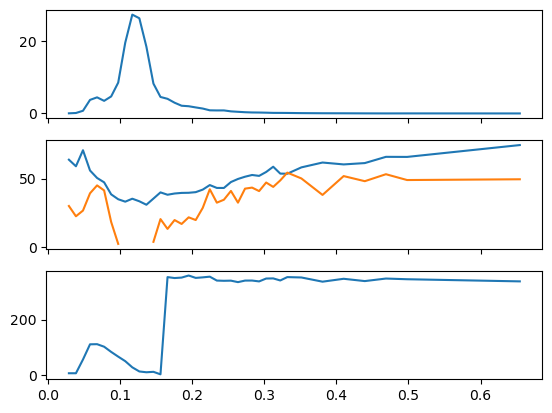

In [72]:
sprd1 = spread1( a1, b1 )
sprd2 = spread2( a2, b2 )
dm = dirm( a1, b1)+180.
dm[dm>=360]=dm[dm>=360]-360.

fig, ax = plt.subplots( 3, 1, sharex=True )
ax[0].plot(f, S)
ax[1].plot(f, sprd1)
ax[1].plot(f, sprd2)
ax[2].plot(f,dm)

[20.         10.          5.          3.33333333  2.5       ]


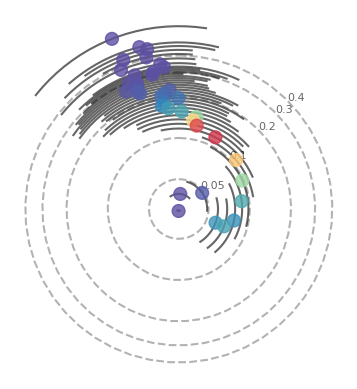

In [108]:
%run -i spec_plot_funcs.py


# try plots for log radius rings
radii_f=[0.05, 0.1, 0.2, 0.3, 0.4] 
print( 1./ np.array( radii_f ) )
x0 = 0.
y0 = 0.
    
fig = plt.figure( )
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')

# frequency rings
for fr in np.array( radii_f ):
    r = logr( fr )
    circle(ax, x0, y0, r, zorder=0)

# label rings
for i in np.array(radii_f):
    ptext(ax, x0, y0, logr(i), 45, "{}".format(i) )
ax.axis('off')

isort = np.argsort(S)
Ss = S[isort]
fs = f[isort]
dms = dm[isort]
sprds = sprd[isort]
cmap = cm.Spectral_r
plt_spread(ax, x0, y0, fs, Ss, dms, sprds, sf=2., ps = 85, fc=1./33., sfr=1., ec='black', cmap=cmap)

In [88]:
norm(Ss)

masked_array(data=[2.24870400e-04, 4.49740800e-04, 6.75532800e-04,
                   9.00403200e-04, 1.35014400e-03, 1.57501440e-03,
                   2.02567680e-03, 3.15095040e-03, 4.27622400e-03,
                   4.72596480e-03, 5.17662720e-03, 5.40149760e-03,
                   7.20138240e-03, 8.55244800e-03, 9.22705920e-03,
                   1.14776064e-02, 1.53040896e-02, 1.93545216e-02,
                   2.47560192e-02, 2.79069696e-02, 2.81318400e-02,
                   2.90322432e-02, 4.52358144e-02, 5.55881472e-02,
                   6.66160128e-02, 7.11171072e-02, 9.90240768e-02,
                   1.16128051e-01, 1.24905370e-01, 1.34807962e-01,
                   1.48311245e-01, 1.51911936e-01, 1.56637901e-01,
                   2.74791629e-01, 2.84019610e-01, 6.14400307e-01,
                   6.51984077e-01, 8.76139315e-01, 9.09671731e-01],
             mask=False,
       fill_value=1e+20)

ValueError: 0.006746112 is not a valid value for color

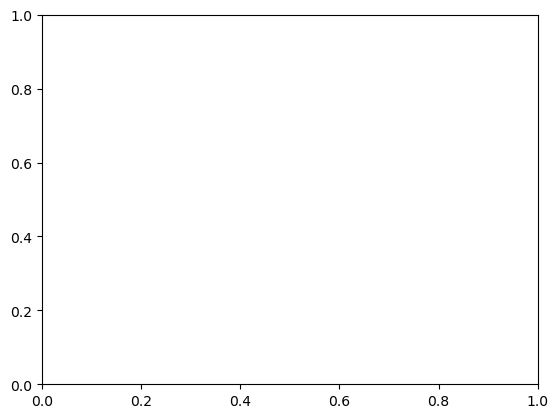

In [99]:
vmin=0.
vmax=30.
cmap = cm.Reds
norm = matplotlib.colors.Normalize(vmin, vmax)

for i in range(len(Ss)):
    plt.plot(fs[i],dms[i],'o',color=Ss[i], norm=norm, cmap = cmap)